<a href="https://www.kaggle.com/code/tanavbajaj/graph-analysis-on-my-linkedin?scriptVersionId=151876131" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Graph Analysis on My Linkedin

In [1]:
import pandas as pd
import pandas_profiling
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm


df = pd.read_csv('/kaggle/input/private-linkedin-connections/Connections.csv')

### Removing some stuff for privacy

In [2]:
# df["Name"] = df["First Name"].map(str) + " " + df["Last Name"] 

In [3]:
df= df.drop(columns=['First Name', 'Last Name', 'Email Address','URL']) # drop for privacy

In [4]:
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Create a df for companies 
This code block creates a new DataFrame called df_company that contains the top 10 companies in my network in df with the highest number of occurrences in the "Company" column.

In [5]:
df_company = df['Company'].value_counts().reset_index()
df_company.columns = ['Company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
# df_company.head(10)
print(df_company.shape)
df_company_reduced = df_company.loc[df_company['count']>=10]
print(df_company_reduced.shape)

(993, 2)
(11, 2)


# Create a df for positions
This code block creates a new DataFrame called df_company that contains the top 10 positions in my network in df with the highest number of occurrences in the "Position" column.

In [6]:
df_position = df['Position'].value_counts().reset_index()
df_position.columns = ['Position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
# df_position.head(10)
print(df_position.shape)
df_position_reduced = df_position.loc[df_position['count']>=10]
print(df_position_reduced.shape)

(936, 2)
(21, 2)


# Visualization

In [7]:
# create graph
G = nx.Graph()

# add root node
G.add_node('root', color='red')

# iterate through rows and add nodes and edges
for i, row in df_company_reduced.iterrows():
    company = row['Company']
    count = row['count']
    G.add_node(company)
    G.add_edge('root', company, weight=count)

# specify node positions
pos = nx.spring_layout(G, seed=42)

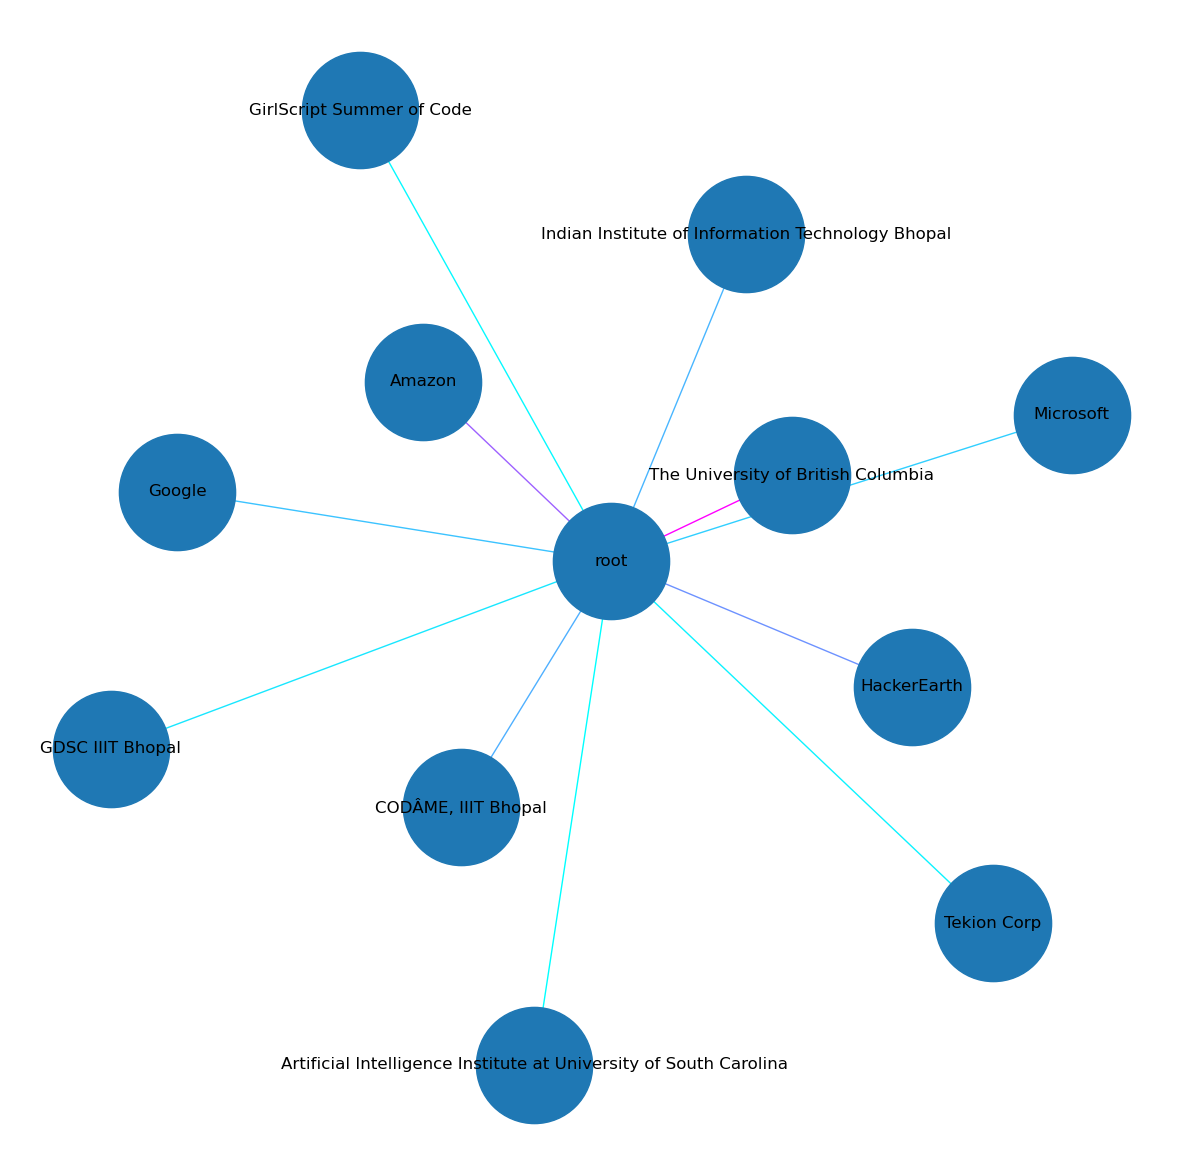

In [8]:
# specify node positions
pos = nx.spring_layout(G)

# get edge weights
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# define colormap
cmap = cm.get_cmap('cool')

# normalize edge weights to [0,1] range
normalize = plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))

# get edge colors
edge_colors = [cmap(normalize(weight)) for weight in edge_weights]

# draw graph with edge colors

plt.figure(figsize=(15,15)) 
nx.draw_networkx_nodes(G, pos, node_size=7000)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)

# show graph
plt.axis('off')
plt.show()

In [9]:

# create graph
G = nx.Graph()

# add root node
G.add_node('root', color='red')

# iterate through rows and add nodes and edges
for i, row in df_position_reduced.iterrows():
    company = row['Position']
    count = row['count']
    G.add_node(company)
    G.add_edge('root', company, weight=count)

# specify node positions
pos = nx.spring_layout(G, seed=42)

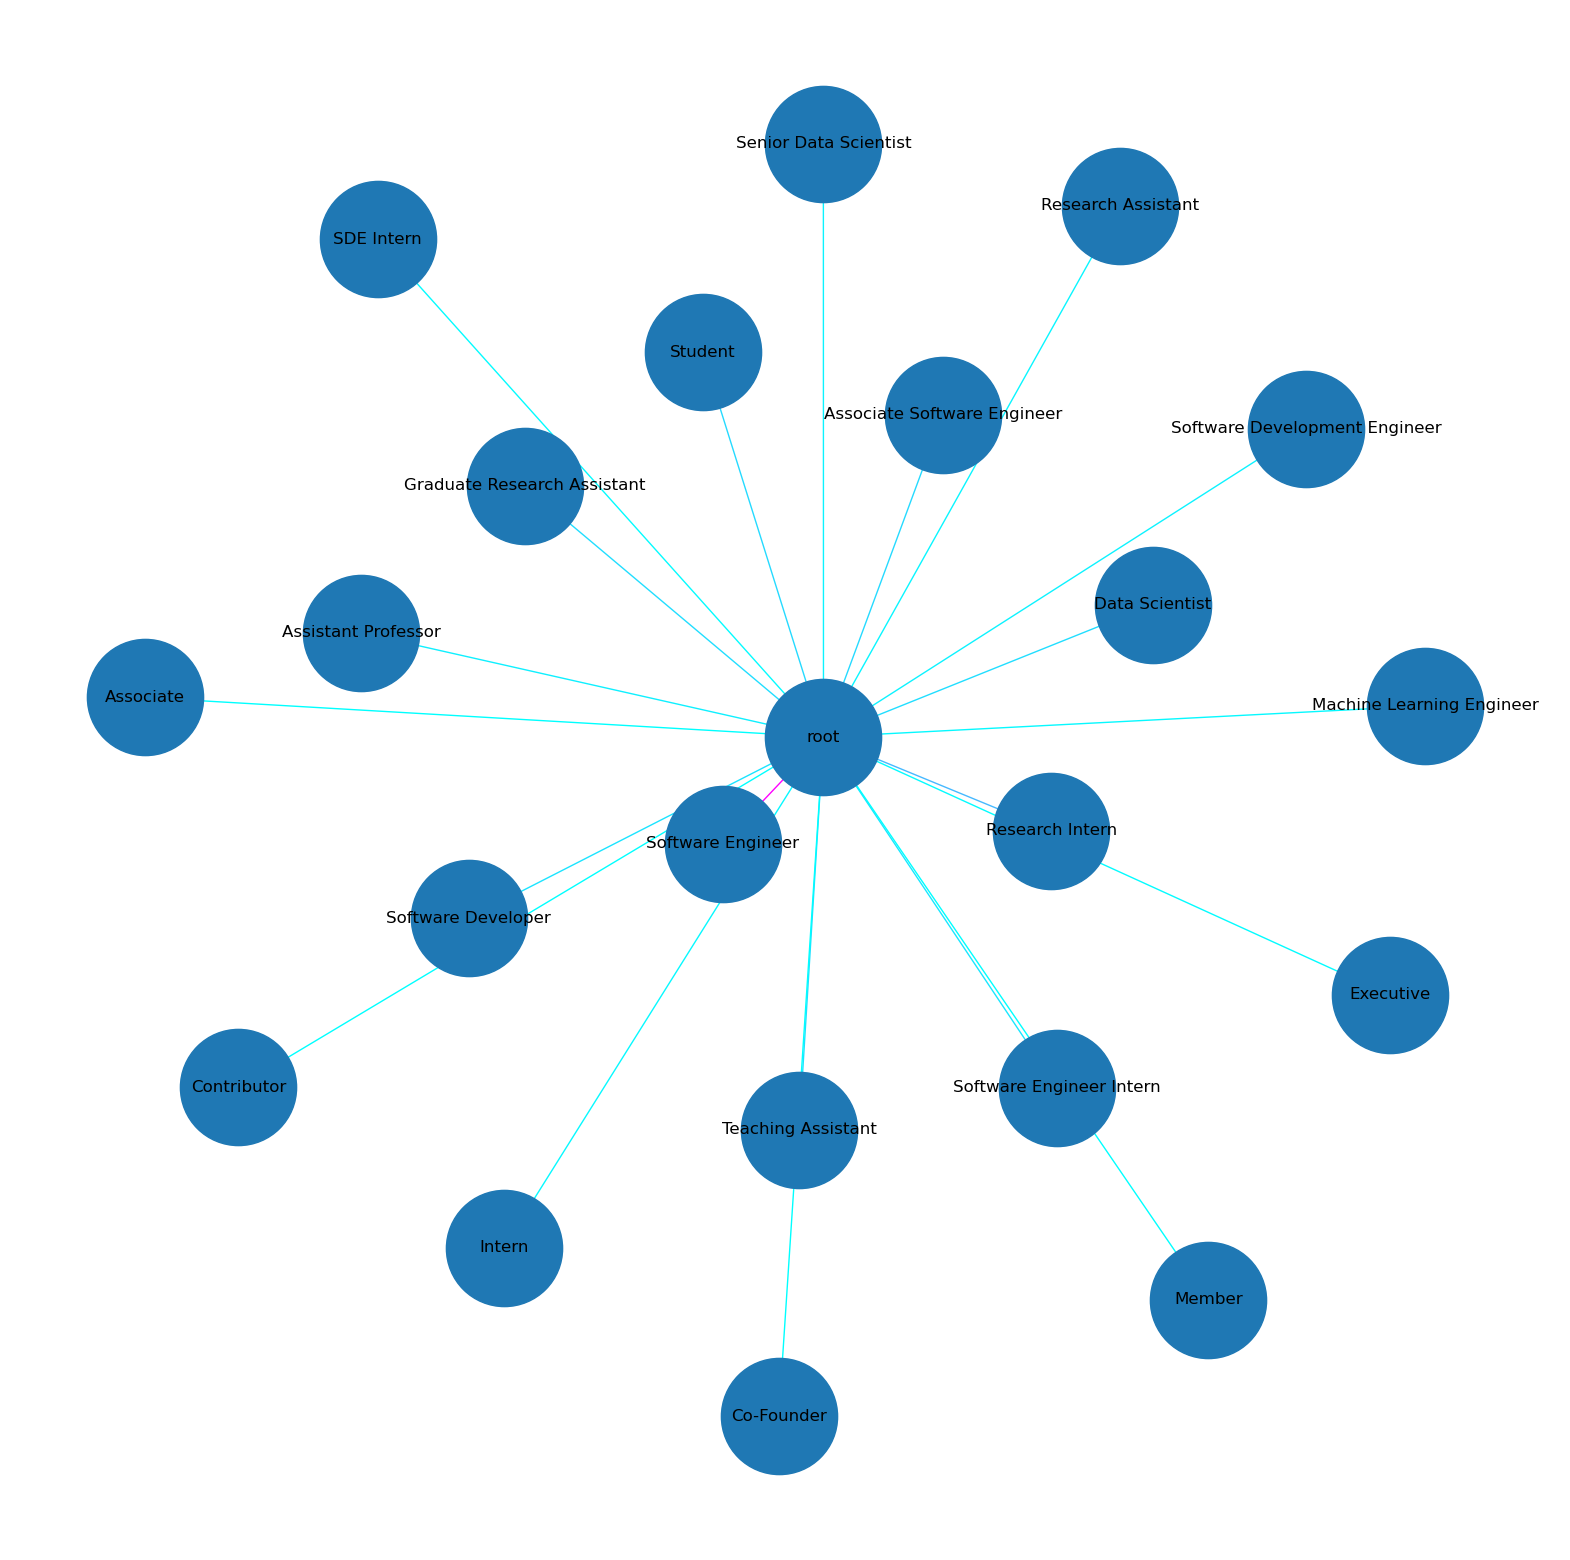

In [10]:

# specify node positions
pos = nx.spring_layout(G)

# get edge weights
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# define colormap
cmap = cm.get_cmap('cool')

# normalize edge weights to [0,1] range
normalize = plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))

# get edge colors
edge_colors = [cmap(normalize(weight)) for weight in edge_weights]

# draw graph with edge colors

plt.figure(figsize=(20,20)) 
nx.draw_networkx_nodes(G, pos, node_size=7000)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)

# show graph
plt.axis('off')
plt.show()